In [3]:
import os
import pandas as pd

res_path = '/home/gabi/diplomka/results/'
base_names = ['labeled_train', 'labeled_valid_unseen_networks-val_loss', 'labeled_valid_unseen_images-val_loss']

def process_res_directory(dir_path: str, with_baselines=True):
    loss_df = pd.read_csv(os.path.join(dir_path, 'loss.csv'), index_col=0)
    labeled_train = loss_df[['labeled_labeled']]
    unlabeled_train = loss_df[['labeled_unlabeled']]
    ununlabeled_train = loss_df[['unlabeled_unlabeled']]
    
    metrics_df = pd.read_csv(os.path.join(dir_path, 'metrics.csv'), index_col=0)
    metric_cols = [c for c in metrics_df.columns]
    
    labeled_val = metrics_df[metric_cols]
                            
    res_df = pd.concat([labeled_train, unlabeled_train, ununlabeled_train, labeled_val], axis=1)
    res_df.reset_index(inplace=True)
    
    exp_name = dir_path.split('/')[-3]
    res_df.insert(0, 'exp_name', exp_name)
    
    if with_baselines:
        baselines = {}
        base_files = ['train_long_baseline.csv', 'valid_long_baseline.csv', 'test_small_split_baseline.csv']
        for name, baseline in zip(base_names, base_files):
            baseline_path = os.path.join(dir_path, baseline)
            base_df = pd.read_csv(baseline_path, index_col=0)

            baselines[name] = base_df

        return exp_name, res_df, baselines
    
    return exp_name, res_df

In [4]:
import glob

dfs = []
baseline_dict = {}

for dir_p in glob.glob(os.path.join(res_path, 'model_config*/2021-19-07_13*/')):
    name, res, base = process_res_directory(dir_p)
    
    dfs.append(res)
    baseline_dict[name] = base
    
dfs = pd.concat(dfs)

In [5]:
dfs[dfs['index'] == 8]

,exp_name,index,labeled_labeled,labeled_unlabeled,unlabeled_unlabeled,labeled_valid_unseen_networks-val_loss,labeled_valid_unseen_networks-MSE,labeled_valid_unseen_networks-L1,labeled_valid_unseen_networks-val_loss_min,labeled_valid_unseen_networks-val_loss_max,...,labeled_mean_corr_adj_val,labeled_mean_fal_pos_adj_val,labeled_acc_adj_val,unlabeled_validity,unlabeled_uniqueness,unlabeled_acc_ops_val,unlabeled_mean_corr_adj_val,unlabeled_mean_fal_pos_adj_val,unlabeled_acc_adj_val,running_time
7,model_config_vae-1.0_labeled-0.5.json,8,0.093220,0.225072,0.232948,0.193057,2.828922e-01,0.386114,0.042106,0.824505,...,0.954732,0.051311,0.985776,0.4565,0.996495,0.977858,0.948730,0.059893,0.980398,5884.432466
7,model_config_axis-0_weighted-false_mult-false....,8,0.001701,0.215444,0.229169,0.001609,3.156991e-03,0.001609,0.000501,0.004551,...,0.961948,0.044575,0.990105,0.4753,0.996423,0.977828,0.958202,0.053118,0.982973,5430.422707
7,model_config_axis-0_weighted-false_mult-true.json,8,0.043637,0.217341,0.230885,117.441794,3.094192e+09,117.441794,0.033217,8048.049805,...,0.960120,0.052620,0.983921,0.4859,0.988475,0.977862,0.957696,0.059931,0.980498,5711.543321
7,model_config_axis-0_weighted-true_mult-true.json,8,0.647399,0.213864,0.226616,0.663696,9.319737e-01,0.663696,0.327478,0.981959,...,0.964627,0.042377,0.991342,0.4536,0.994268,0.977845,0.958181,0.051356,0.984990,5750.952041
7,model_config_axis-null_weighted-false_mult-fal...,8,1.835072,0.218170,0.227993,1.946470,9.436176e+00,1.946470,0.738420,2.748340,...,0.960561,0.046676,0.987013,0.4772,0.995809,0.977835,0.959492,0.054058,0.984737,5441.908215
7,model_config_axis-null_weighted-false_mult-tru...,8,0.181473,0.232385,0.235550,0.382393,2.696437e-01,0.382393,0.089180,1.486234,...,0.956741,0.054090,0.985776,0.4947,0.992521,0.977841,0.951446,0.061476,0.981211,5507.804521
7,model_config_axis-null_weighted-true_mult-true...,8,0.551957,0.216701,0.228469,0.601236,9.372722e-01,0.601236,0.325327,1.114293,...,0.963923,0.046705,0.988250,0.4749,0.995578,0.977852,0.957876,0.054686,0.983943,5539.936404
7,model_config_loss-L1_lr-1e-2.json,8,0.754154,0.225275,0.261052,0.704586,8.719205e-01,0.704586,0.107761,2.626803,...,0.928319,0.090750,0.946197,0.4444,0.995275,0.977710,0.925257,0.102432,0.942235,5584.609754
7,model_config_loss-L1_lr-1e-3.json,8,0.181802,0.234322,0.238875,0.407971,3.125921e-01,0.407971,0.088362,1.618242,...,0.942820,0.076252,0.966605,0.4776,0.989740,0.977845,0.939228,0.081442,0.966909,5443.260479
7,model_config_loss-L1_lr-1e-4.json,8,0.177141,0.228261,0.229335,0.416477,3.401540e-01,0.416477,0.091554,1.964566,...,0.957425,0.047509,0.988250,0.4544,0.992077,0.977865,0.954194,0.054256,0.984835,5557.662325


In [367]:
print(dfs[dfs['index'] == 8][[c for c in dfs.columns if 'acc' in c or 'exp' in c]].round(4).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &                                           exp\_name &  labeled\_acc\_ops\_val &  labeled\_acc\_adj\_val &  unlabeled\_acc\_ops\_val &  unlabeled\_acc\_adj\_val \\
\midrule
7 &  model\_config\_axis-0\_weighted-false\_mult-false.... &               0.9777 &               0.9901 &                 0.9778 &                 0.9830 \\
7 &  model\_config\_axis-0\_weighted-false\_mult-true.json &               0.9777 &               0.9839 &                 0.9779 &                 0.9805 \\
7 &   model\_config\_axis-0\_weighted-true\_mult-true.json &               0.9777 &               0.9913 &                 0.9778 &                 0.9850 \\
7 &  model\_config\_axis-null\_weighted-false\_mult-fal... &               0.9777 &               0.9870 &                 0.9778 &                 0.9847 \\
7 &  model\_config\_axis-null\_weighted-false\_mult-tru... &               0.9777 &               0.9858 &                 0.9778 &                 0.9812 \\


In [21]:
def get_comparison_for_epoch(full_df, reference, epoch):
    preserve_columns = ['labeled_unlabeled', 'validity', 'labeled_labeled', 'unlabeled_unlabeled', 'exp_name', 'index']
    #columns = [c for c in full_df.columns if 'val_loss' in c or c in preserve_columns]
    columns = [c for c in full_df.columns if 'L1' in c or c in preserve_columns]
    
    filtered_df = full_df[columns]
    filtered_df = filtered_df[filtered_df['index'] == epoch].reset_index(drop=True)
    res_df = []
    
    for i, exp_name in enumerate(filtered_df['exp_name']):
        res_entry = {}
        
        if 'vae' in exp_name:
            vae = exp_name[17:21]
            vae = 1.0 if '1.0' in vae else float(vae)
            labeled = float(exp_name[29:31].replace('-', ''))
            
            if labeled == 0:
                labeled = 0.5
            elif labeled == 5:
                labeled = 50.0
            
            res_entry['labeled_labeled_scaled'] = filtered_df.iloc[i]['labeled_labeled'] / labeled
            res_entry['labeled_unlabeled_scaled'] = filtered_df.iloc[i]['labeled_unlabeled'] / vae
            res_entry['unlabeled_unlabeled_scaled'] = filtered_df.iloc[i]['unlabeled_unlabeled'] / vae
            for c in filtered_df.columns:
                if 'labeled_valid' not in c or 'name' in c:
                    continue
                res_entry[f"{c}_scaled"] = filtered_df.iloc[i][c] / labeled
        else:
            labeled = 1.0
        
        exp_ref = reference[exp_name]
        for b in base_names:
            b_df = exp_ref[b]
                        
            use_id = 0 if 'MSE' in exp_name else 1
            res_entry.update({f"{b}_{k}_ref": v for k, v in b_df.iloc[use_id].iteritems()})
            
            
        res_df.append(res_entry)
    
    res_df = pd.DataFrame(res_df)
    res_df = pd.concat([filtered_df, res_df], axis=1)
    res_df = res_df.reindex(sorted(res_df.columns), axis=1)
    return res_df

In [22]:
i = 8
rd = get_comparison_for_epoch(dfs, baseline_dict, i).round(8)
rd.to_csv(f'expe_data/epoch_{i}_w_baselines.csv')

In [254]:
rd.reindex(sorted(rd.columns), axis=1)

,exp_name,index,labeled_labeled,labeled_labeled_scaled,labeled_train_loss_name_ref,labeled_train_max_ref,labeled_train_mean_ref,labeled_train_median_ref,labeled_train_min_ref,labeled_train_std_ref,...,labeled_valid_unseen_networks-val_loss_median_ref,labeled_valid_unseen_networks-val_loss_median_scaled,labeled_valid_unseen_networks-val_loss_min,labeled_valid_unseen_networks-val_loss_min_ref,labeled_valid_unseen_networks-val_loss_min_scaled,labeled_valid_unseen_networks-val_loss_scaled,labeled_valid_unseen_networks-val_loss_std,labeled_valid_unseen_networks-val_loss_std_ref,labeled_valid_unseen_networks-val_loss_std_scaled,unlabeled_unlabeled
0,model_config_axis-0_weighted-false_mult-false....,8,0.001701,NaN,L1,0.006104,0.001659,0.001606,0.000776,0.000375,...,0.001488,NaN,0.000501,0.000423,NaN,NaN,0.000545,0.000518,NaN,0.229169
1,model_config_axis-0_weighted-false_mult-true.json,8,0.043637,NaN,L1,0.095878,0.085476,0.085298,0.078573,0.002384,...,117.517487,NaN,0.033217,117.509260,NaN,NaN,783.484893,779.903502,NaN,0.230885
2,model_config_axis-0_weighted-true_mult-true.json,8,0.647399,NaN,L1,1.626011,0.713126,0.703105,0.594080,0.055006,...,0.693630,NaN,0.327478,0.443386,NaN,NaN,0.084791,0.075277,NaN,0.226616
3,model_config_axis-null_weighted-false_mult-fal...,8,1.835072,NaN,L1,4.564875,2.091181,2.060045,1.659586,0.174519,...,2.064780,NaN,0.738420,1.193783,NaN,NaN,0.290472,0.245332,NaN,0.227993
4,model_config_axis-null_weighted-false_mult-tru...,8,0.181473,NaN,L1,1.209878,0.765579,0.761163,0.412319,0.106959,...,0.511811,NaN,0.089180,0.105278,NaN,NaN,0.277119,0.525986,NaN,0.235550
5,model_config_axis-null_weighted-true_mult-true...,8,0.551957,NaN,L1,1.762504,0.669126,0.657735,0.560062,0.063046,...,0.658170,NaN,0.325327,0.457067,NaN,NaN,0.100253,0.101525,NaN,0.228469
6,model_config_loss-L1_lr-1e-2.json,8,0.754154,NaN,L1,1.209878,0.765579,0.761163,0.412319,0.106959,...,0.511811,NaN,0.107761,0.105278,NaN,NaN,0.566948,0.525986,NaN,0.261052
7,model_config_loss-L1_lr-1e-3.json,8,0.181802,NaN,L1,1.209878,0.765579,0.761163,0.412319,0.106959,...,0.511811,NaN,0.088362,0.105278,NaN,NaN,0.314118,0.525986,NaN,0.238875
8,model_config_loss-L1_lr-1e-4.json,8,0.177141,NaN,L1,1.209878,0.765579,0.761163,0.412319,0.106959,...,0.511811,NaN,0.091554,0.105278,NaN,NaN,0.350672,0.525986,NaN,0.229335
9,model_config_loss-MSE_lr-1e-2.json,8,0.283606,NaN,MSE,2.707990,1.000185,0.962370,0.314191,0.289896,...,0.304573,NaN,0.030062,0.037128,NaN,NaN,0.450584,1.126022,NaN,0.276906


In [255]:
sorted(rd.columns)

['exp_name',
 'index',
 'labeled_labeled',
 'labeled_labeled_scaled',
 'labeled_train_loss_name_ref',
 'labeled_train_max_ref',
 'labeled_train_mean_ref',
 'labeled_train_median_ref',
 'labeled_train_min_ref',
 'labeled_train_std_ref',
 'labeled_unlabeled',
 'labeled_unlabeled_scaled',
 'labeled_valid_unseen_images-val_loss',
 'labeled_valid_unseen_images-val_loss_loss_name_ref',
 'labeled_valid_unseen_images-val_loss_max',
 'labeled_valid_unseen_images-val_loss_max_ref',
 'labeled_valid_unseen_images-val_loss_max_scaled',
 'labeled_valid_unseen_images-val_loss_mean_ref',
 'labeled_valid_unseen_images-val_loss_median',
 'labeled_valid_unseen_images-val_loss_median_ref',
 'labeled_valid_unseen_images-val_loss_median_scaled',
 'labeled_valid_unseen_images-val_loss_min',
 'labeled_valid_unseen_images-val_loss_min_ref',
 'labeled_valid_unseen_images-val_loss_min_scaled',
 'labeled_valid_unseen_images-val_loss_scaled',
 'labeled_valid_unseen_images-val_loss_std',
 'labeled_valid_unseen_imag

In [214]:
im_paths = glob.glob(os.path.join(res_path, 'model_config_loss-MSE_lr-1e-4.json/*/'))
im_paths

['/home/gabi/diplomka/results/model_config_loss-MSE_lr-1e-4.json/2021-19-07_13-01-12/',
 '/home/gabi/diplomka/results/model_config_loss-MSE_lr-1e-4.json/2021-19-07_19-52-14/']

In [215]:
im1_name, im1_res, base = process_res_directory(im_paths[0])
im2_name, im2_res = process_res_directory(im_paths[1], with_baselines=False)

In [216]:
base

{'labeled_train':   loss_name      mean       std       min       max    median
 0       MSE  1.000185  0.289896  0.314191  2.707990  0.962370
 1        L1  0.765579  0.106959  0.412319  1.209878  0.761163
 2     Huber  0.407250  0.089773  0.151409  0.813649  0.401320,
 'labeled_valid_unseen_networks-val_loss':   loss_name      mean       std       min       max    median
 0       MSE  0.834597  1.126022  0.037128  6.101653  0.304573
 1        L1  0.710611  0.525986  0.105278  2.441400  0.511811
 2     Huber  0.359268  0.425021  0.018274  1.943842  0.148049,
 'labeled_valid_unseen_images-val_loss':   loss_name      mean       std       min       max    median
 0       MSE  0.958540  0.337582  0.292087  2.829140  0.905116
 1        L1  0.725408  0.108752  0.441126  1.138974  0.717286
 2     Huber  0.375167  0.093793  0.142421  0.734999  0.367203}

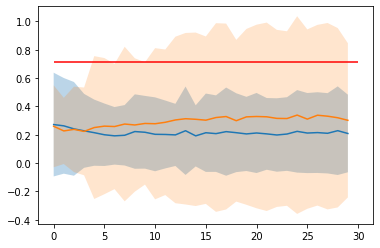

In [217]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

val_loss = im1_res['labeled_valid_unseen_networks-val_loss']
val_loss_std = im1_res['labeled_valid_unseen_networks-val_loss_std']
val_loss2 = im2_res['labeled_valid_unseen_networks-val_loss']
val_loss2_std = im2_res['labeled_valid_unseen_networks-val_loss_std']
val_base = base['labeled_valid_unseen_networks-val_loss'].iloc[1]['mean']
val_base_std = base['labeled_valid_unseen_networks-val_loss'].iloc[1]['std']

plt.figure()
plt.plot(val_loss)
plt.fill_between(np.arange(len(val_loss)), val_loss + val_loss_std, val_loss - val_loss_std, alpha=0.3)
plt.plot(val_loss2)
plt.fill_between(np.arange(len(val_loss2)), val_loss2 + val_loss2_std, val_loss2 - val_loss2_std, alpha=0.2)
plt.hlines(val_base, 0, len(val_loss), colors='r')
plt.show()

In [204]:
im_paths = glob.glob(os.path.join(res_path, 'model_config_loss-L1_lr-1e-3.json/*/'))

im1_name, im1_res, base = process_res_directory(im_paths[0])
im2_name, im2_res = process_res_directory(im_paths[1], with_baselines=False)

im_paths

['/home/gabi/diplomka/results/model_config_loss-L1_lr-1e-3.json/2021-19-07_13-01-39/',
 '/home/gabi/diplomka/results/model_config_loss-L1_lr-1e-3.json/2021-19-07_19-52-21/']

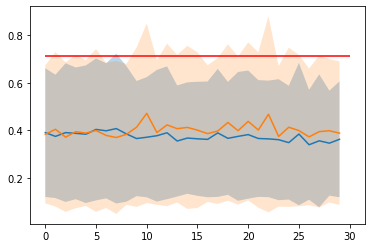

In [205]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

val_loss = im1_res['labeled_valid_unseen_networks-val_loss']
val_loss_std = im1_res['labeled_valid_unseen_networks-val_loss_std']
val_loss2 = im2_res['labeled_valid_unseen_networks-val_loss']
val_loss2_std = im2_res['labeled_valid_unseen_networks-val_loss_std']
val_base = base['labeled_valid_unseen_networks-val_loss'].iloc[1]['mean']
val_base_std = base['labeled_valid_unseen_networks-val_loss'].iloc[1]['std']

plt.figure()
plt.plot(val_loss)
plt.fill_between(np.arange(len(val_loss)), val_loss + val_loss_std, val_loss - val_loss_std, alpha=0.3)
plt.plot(val_loss2)
plt.fill_between(np.arange(len(val_loss2)), val_loss2 + val_loss2_std, val_loss2 - val_loss2_std, alpha=0.2)
plt.hlines(val_base, 0, len(val_loss), colors='r')
plt.show()

In [6]:
rd8 = get_comparison_for_epoch(dfs, baseline_dict, 8)
rd20 = get_comparison_for_epoch(dfs, baseline_dict, 20)
rd30 = get_comparison_for_epoch(dfs, baseline_dict, 30)

In [7]:
train_samples = 608000
val_samples = 77000
test_samples = 122000

def ci_95(std, sample_size):
    return 1.96 * std / np.sqrt(sample_size)

In [11]:
import numpy as np

def replace_with_scaled(df, normal_column_name, scaled_column):
    for i, val in scaled_column.iteritems():
        if not pd.isna(val):
            #print(i)
            df.loc[i, normal_column_name] = val

def rename_expe(name):
    name = name.replace('model_config_', '').replace('.json', '')
    name = ', '.join(name.split('_'))
    name = ': '.join(name.split('-'))
    return name

def get_epoch_stats_train(rd):
    lossn = 'labeled_valid_unseen_images-val_loss_loss_name_ref'
    lu = 'labeled_unlabeled'
    uu = 'unlabeled_unlabeled'
    mean_train = rd[['exp_name', lossn, uu, lu, 'labeled_labeled', 'labeled_train_mean_ref']].copy()
    ci_ref = ci_95(rd['labeled_train_std_ref'], train_samples)
    mean_train['ci'] = ci_ref
    
    mean_train.columns = [(c if c != lossn else 'loss name') for c in mean_train.columns]
    
    replace_with_scaled(mean_train, 'labeled_unlabeled', rd['labeled_unlabeled_scaled'])
    replace_with_scaled(mean_train, 'labeled_labeled', rd['labeled_labeled_scaled'])
    mean_train['exp_name'] = [rename_expe(e) for e in mean_train['exp_name']]
    
    return mean_train

def get_epoch_stats_val(rd, name, samples, new_name):
    mean_val = rd[f'{name}']
    mean_ref = rd[f'{name}_mean_ref']
    ci = ci_95(rd[f'{name}_std'], samples)
    ci_ref = ci_95(rd[f'{name}_std_ref'], samples)
    
    df = pd.concat([mean_val, ci, mean_ref, ci_ref], axis=1)
    df.columns = [f"{new_name}_mean", f"{new_name}_ci", f"{new_name}_mean_ref", f"{new_name}_ci_ref"]
    
    replace_with_scaled(df, f'{new_name}_mean', rd[f'{name}_scaled'])
    
    return df
   
in_rd = rd8
res = get_epoch_stats_train(in_rd)
resv = get_epoch_stats_val(in_rd, 'labeled_valid_unseen_networks-val_loss', val_samples, 'unseen_networks')
rest = get_epoch_stats_val(in_rd, 'labeled_valid_unseen_images-val_loss', test_samples, 'unseen_images')
res = pd.concat([res, resv, rest], axis=1).round(4)
print(' '.join([w for w in res.to_latex(index=False).split(' ') if len(w)]))
res

KeyError: 'labeled_valid_unseen_networks-L1_mean_ref'

In [23]:
rd8.columns

Index(['exp_name', 'index', 'labeled_labeled', 'labeled_labeled_scaled',
       'labeled_train_loss_name_ref', 'labeled_train_max_ref',
       'labeled_train_mean_ref', 'labeled_train_median_ref',
       'labeled_train_min_ref', 'labeled_train_std_ref', 'labeled_unlabeled',
       'labeled_unlabeled_scaled', 'labeled_valid_unseen_images-L1',
       'labeled_valid_unseen_images-L1_scaled',
       'labeled_valid_unseen_images-val_loss_loss_name_ref',
       'labeled_valid_unseen_images-val_loss_max_ref',
       'labeled_valid_unseen_images-val_loss_mean_ref',
       'labeled_valid_unseen_images-val_loss_median_ref',
       'labeled_valid_unseen_images-val_loss_min_ref',
       'labeled_valid_unseen_images-val_loss_std_ref',
       'labeled_valid_unseen_networks-L1',
       'labeled_valid_unseen_networks-L1_scaled',
       'labeled_valid_unseen_networks-val_loss_loss_name_ref',
       'labeled_valid_unseen_networks-val_loss_max_ref',
       'labeled_valid_unseen_networks-val_loss_mean_ref

In [20]:
print(rd8[['exp_name', 'labeled_valid_unseen_networks-L1', 'labeled_valid_unseen_images-L1']].to_latex())

\begin{tabular}{llrr}
\toprule
{} &                                           exp\_name &  labeled\_valid\_unseen\_networks-L1 &  labeled\_valid\_unseen\_images-L1 \\
\midrule
0  &              model\_config\_vae-1.0\_labeled-0.5.json &                          0.386114 &                        0.231962 \\
1  &  model\_config\_axis-0\_weighted-false\_mult-false.... &                          0.001609 &                        0.001838 \\
2  &  model\_config\_axis-0\_weighted-false\_mult-true.json &                        117.441794 &                        0.044785 \\
3  &   model\_config\_axis-0\_weighted-true\_mult-true.json &                          0.663696 &                        0.733104 \\
4  &  model\_config\_axis-null\_weighted-false\_mult-fal... &                          1.946470 &                        2.103649 \\
5  &  model\_config\_axis-null\_weighted-false\_mult-tru... &                          0.382393 &                        0.210620 \\
6  &  model\_config\_axis-n

In [354]:
print(' '.join([w for w in res[['exp_name', 'labeled_unlabeled', 'unlabeled_unlabeled']].to_latex(index=False).split(' ') if len(w)]))

\begin{tabular}{lrr}
\toprule
 exp\_name & labeled\_unlabeled & unlabeled\_unlabeled \\
\midrule
 axis: 0, weighted: false, mult: false & 0.2154 & 0.2292 \\
 axis: 0, weighted: false, mult: true & 0.2173 & 0.2309 \\
 axis: 0, weighted: true, mult: true & 0.2139 & 0.2266 \\
axis: null, weighted: false, mult: false & 0.2182 & 0.2280 \\
 axis: null, weighted: false, mult: true & 0.2324 & 0.2355 \\
 axis: null, weighted: true, mult: true & 0.2167 & 0.2285 \\
 loss: L1, lr: 1e: 2 & 0.2253 & 0.2611 \\
 loss: L1, lr: 1e: 3 & 0.2343 & 0.2389 \\
 loss: L1, lr: 1e: 4 & 0.2283 & 0.2293 \\
 loss: MSE, lr: 1e: 2 & 0.2664 & 0.2769 \\
 loss: MSE, lr: 1e: 3 & 0.2260 & 0.2325 \\
 loss: MSE, lr: 1e: 4 & 0.2229 & 0.2258 \\
 vae: 1.0, labeled: 0.5 & 0.2251 & 0.2329 \\
 vae: 1.0, labeled: 1 & 0.2330 & 0.2377 \\
 vae: 1.0, labeled: 3 & 0.2471 & 0.2400 \\
 vae: 1.0, labeled: 50 & 0.3279 & 0.2554 \\
 vae: 1e: 2, labeled: 0.5 & 0.3262 & 0.2512 \\
 vae: 1e: 2, labeled: 1 & 0.3462 & 0.2547 \\
 vae: 1e: 2, labele

In [292]:
for i, a in rd8['labeled_valid_unseen_images-val_loss'].iteritems():
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [374]:
rd8['labeled_valid_unseen_images-val_loss']

0      0.001838
1      0.044785
2      0.733104
3      2.103649
4      0.210620
5      0.646328
6      0.725560
7      0.229195
8      0.136863
9      0.339956
10     0.150556
11     0.076442
12     0.115981
13     0.212807
14     0.546598
15    10.409115
16     0.088756
17     0.171747
18     0.525550
19     8.388120
20     0.082696
21     0.178354
22     0.510355
23     8.157585
Name: labeled_valid_unseen_images-val_loss, dtype: float64

In [335]:
a = """0, false, false    & L1 & 0.0017 & $0.0017 \pm 0.0000$  & $0.0016   \pm 0.0000$ & $0.0016  \pm 0.0000$ & $0.0018 \pm 0.0000$ & $0.0018 \pm 0.0000$\\
0, false, true     & L1 & 0.0436 & $0.0855 \pm 0.0000$  & $117.44  \pm 5.5340$ & $234.38 \pm 5.5087$ & $0.0448 \pm 0.0000$ & $0.0877 \pm 0.0000$ \\
0, true, true      & L1 & 0.6474 & $0.7131 \pm 0.0001$  & $0.6637   \pm 0.0006$ & $0.6980  \pm 0.0005$ & $0.7331 \pm 0.0007$ & $0.7707 \pm 0.0003$\\
null, false, false & L1 & 1.8351 & $2.0912 \pm 0.0004$  & $1.9465   \pm 0.0021$ & $2.0696  \pm 0.0017$ & $2.1036 \pm 0.0024$ & $2.2572 \pm 0.0011$\\
null, false, true  & L1 & 0.1815 & $0.7656 \pm 0.0003$  & $0.3824   \pm 0.0020$ & $0.7106  \pm 0.0037$ & $0.2106 \pm 0.0008$ & $0.7254 \pm 0.0006$\\
null, true, true   & L1 & 0.5520 & $0.6691 \pm 0.0002$  & $0.6012   \pm 0.0007$ & $0.6717  \pm 0.0007$ & $0.6463 \pm 0.0008$ & $0.7404 \pm 0.0004$\\
L1, 1e: 2          & L1 & 0.7542 & $0.7656 \pm 0.0003$  & $0.7046   \pm 0.0040$ & $0.7106  \pm 0.0037$ & $0.7256 \pm 0.0034$ & $0.7254 \pm 0.0006$\\
L1, 1e: 3          & L1 & 0.1818 & $0.7656 \pm 0.0003$  & $0.4080   \pm 0.0022$ & $0.7106  \pm 0.0037$ & $0.2292 \pm 0.0009$ & $0.7254 \pm 0.0006$\\
 L1, 1e: 4         & L1 & 0.1771 & $0.7656 \pm 0.0003$  & $0.4165   \pm 0.0025$ & $0.7106  \pm 0.0037$ & $0.1369 \pm 0.0002$ & $0.7254 \pm 0.0006$\\
 MSE, 1e: 2       & MSE & 0.2836 & $1.0002 \pm 0.0007$  & $0.3603   \pm 0.0032$ & $0.8346  \pm 0.0080$ & $0.3400 \pm 0.0035$ & $0.9585 \pm 0.0019$\\
MSE, 1e: 3        & MSE & 0.0832 & $1.0002 \pm 0.0007$  & $0.2894   \pm 0.0030$ & $0.8346  \pm 0.0080$ & $0.1506 \pm 0.0009$ & $0.9585 \pm 0.0019$\\
MSE, 1e: 4        & MSE & 0.0804 & $1.0002 \pm 0.0007$  & $0.1964   \pm 0.0015$ & $0.8346  \pm 0.0080$ & $0.0764 \pm 0.0003$ & $0.9585 \pm 0.0019$\\
1.0, 0.5           & L1 & 0.1864 & $0.7656 \pm 0.0003$  & $0.3861   \pm 0.0010$ & $0.7106  \pm 0.0037$ & $0.2320 \pm 0.0005$ & $0.7254 \pm 0.0006$\\
1.0, 1             & L1 & 0.1788 & $0.7656 \pm 0.0003$  & $0.3598   \pm 0.0016$ & $0.7106  \pm 0.0037$ & $0.2128 \pm 0.0009$ & $0.7254 \pm 0.0006$\\
1.0, 3             & L1 & 0.1749 & $0.7656 \pm 0.0003$  & $0.3856   \pm 0.0064$ & $0.7106  \pm 0.0037$ & $0.1822 \pm 0.0022$ & $0.7254 \pm 0.0006$\\
1.0, 50            & L1 & 0.1772 & $0.7656 \pm 0.0003$  & $0.4287   \pm 0.1257$ & $0.7106  \pm 0.0037$ & $0.2082 \pm 0.0425$ & $0.7254 \pm 0.0006$\\
1e: 2, 0.5         & L1 & 0.1796 & $0.7656 \pm 0.0003$  & $0.3817   \pm 0.0011$ & $0.7106  \pm 0.0037$ & $0.1775 \pm 0.0003$ & $0.7254 \pm 0.0006$\\
1e: 2, 1           & L1 & 0.1773 & $0.7656 \pm 0.0003$  & $0.3905   \pm 0.0021$ & $0.7106  \pm 0.0037$ & $0.1717 \pm 0.0006$ & $0.7254 \pm 0.0006$\\
1e: 2, 3           & L1 & 0.1796 & $0.7656 \pm 0.0003$  & $0.3978   \pm 0.0067$ & $0.7106  \pm 0.0037$ & $0.1752 \pm 0.0023$ & $0.7254 \pm 0.0006$\\
1e: 2, 50          & L1 & 0.1861 & $0.7656 \pm 0.0003$  & $0.3746   \pm 0.0869$ & $0.7106  \pm 0.0037$ & $0.1678 \pm 0.0176$ & $0.7254 \pm 0.0006$\\
1e: 4, 0.5         & L1 & 0.1814 & $0.7656 \pm 0.0003$  & $0.4273   \pm 0.0011$ & $0.7106  \pm 0.0037$ & $0.1654 \pm 0.0002$ & $0.7254 \pm 0.0006$\\
1e: 4, 1           & L1 & 0.1797 & $0.7656 \pm 0.0003$  & $0.3306   \pm 0.0015$ & $0.7106  \pm 0.0037$ & $0.1784 \pm 0.0005$ & $0.7254 \pm 0.0006$\\
1e: 4, 3           & L1 & 0.1808 & $0.7656 \pm 0.0003$  & $0.3361   \pm 0.0051$ & $0.7106  \pm 0.0037$ & $0.1701 \pm 0.0009$ & $0.7254 \pm 0.0006$\\
1e: 4, 50          & L1 & 0.1812 & $0.7656 \pm 0.0003$  & $0.3426   \pm 0.0834$ & $0.7106  \pm 0.0037$ & $0.1632 \pm 0.0158$ & $0.7254 \pm 0.0006$\\"""
a = [b.split('&') for b in a.split('\n')]
print('\n'.join([' & '.join(b) for b in np.array(a)[:6].T.tolist()]))

0, false, false     & 0, false, true      & 0, true, true       & null, false, false  & null, false, true   & null, true, true   
 L1  &  L1  &  L1  &  L1  &  L1  &  L1 
 0.0017  &  0.0436  &  0.6474  &  1.8351  &  0.1815  &  0.5520 
 $0.0017 \pm 0.0000$   &  $0.0855 \pm 0.0000$   &  $0.7131 \pm 0.0001$   &  $2.0912 \pm 0.0004$   &  $0.7656 \pm 0.0003$   &  $0.6691 \pm 0.0002$  
 $0.0016   \pm 0.0000$  &  $117.44  \pm 5.5340$  &  $0.6637   \pm 0.0006$  &  $1.9465   \pm 0.0021$  &  $0.3824   \pm 0.0020$  &  $0.6012   \pm 0.0007$ 
 $0.0016  \pm 0.0000$  &  $234.38 \pm 5.5087$  &  $0.6980  \pm 0.0005$  &  $2.0696  \pm 0.0017$  &  $0.7106  \pm 0.0037$  &  $0.6717  \pm 0.0007$ 
 $0.0018 \pm 0.0000$  &  $0.0448 \pm 0.0000$  &  $0.7331 \pm 0.0007$  &  $2.1036 \pm 0.0024$  &  $0.2106 \pm 0.0008$  &  $0.6463 \pm 0.0008$ 
 $0.0018 \pm 0.0000$\ &  $0.0877 \pm 0.0000$ \ &  $0.7707 \pm 0.0003$\ &  $2.2572 \pm 0.0011$\ &  $0.7254 \pm 0.0006$\ &  $0.7404 \pm 0.0004$\
